# Lung Disease

In [1]:
import pandas as pd
import numpy as np

df_lung = pd.read_csv('../input/LungDisease.csv')
df_lung.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


Text(0,0.5,'PEFR')

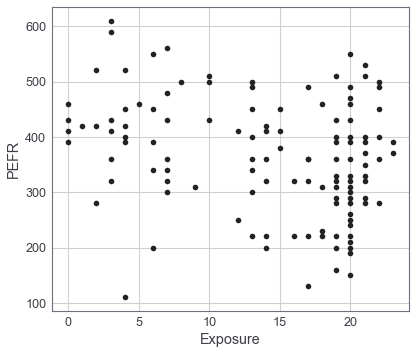

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

pefr = df_lung['PEFR'].values
expo = df_lung['Exposure'].values

plt.plot(expo, pefr, 'ko')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [3]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(expo.reshape(-1,1), pefr)
print(lin_reg.coef_, lin_reg.intercept_)

[-4.18457649] 424.582806573957


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Text(0,0.5,'PEFR')

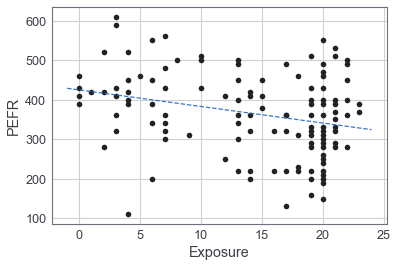

In [4]:
plt.plot(expo, pefr, 'ko')
plt.plot(range(-1,25), lin_reg.predict(np.array(range(-1,25)).reshape(-1,1)), 'b--')
plt.xlabel('Exposure')
plt.ylabel('PEFR')

In [5]:
lin_reg.score(expo.reshape(-1,1), pefr)

0.0767410228628338

# King County Housing Data

In [245]:
df_house = pd.read_csv('../input/house_sales.csv', sep='\t')
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [7]:
X = df_house[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']].values
X

array([[2.4000e+03, 9.3730e+03, 3.0000e+00, 6.0000e+00, 7.0000e+00],
       [3.7640e+03, 2.0156e+04, 3.7500e+00, 4.0000e+00, 1.0000e+01],
       [2.0600e+03, 2.6036e+04, 1.7500e+00, 4.0000e+00, 8.0000e+00],
       ...,
       [1.0700e+03, 1.1170e+04, 1.0000e+00, 4.0000e+00, 6.0000e+00],
       [1.3450e+03, 6.2230e+03, 2.0000e+00, 3.0000e+00, 7.0000e+00],
       [7.9000e+02, 4.4000e+03, 1.5000e+00, 3.0000e+00, 7.0000e+00]])

In [8]:
y = df_house['AdjSalePrice'].values
y

array([ 300805., 1076162.,  761805., ...,  220744.,  342207.,  475489.])

In [9]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.score(X, y)

0.5406641508395744

In [11]:
print(lin_reg.coef_, lin_reg.intercept_)

[ 2.28832107e+02 -6.05060092e-02 -1.94380990e+04 -4.77811534e+04
  1.06117210e+05] -521924.72203797416


In [12]:
lin_reg.score(X, y)

0.5406641508395744

In [13]:
import statsmodels.api as sm

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        08:52:11   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.219e+05   1.57e+04    -33.349      0.000   -5.53e+05   -4.91e+05
x1           228.8321      3.898     58.699      0.000     221.191     236.473
x2            -0.0605      0.061     -0.989      0.323      -0.180       0.059
x3         -1.944e+04   3625.219     -5.362      0.000   -2.65e+04   -1.23e+04
x4         -4.778e+04   2489.443    -19.194      0.000   -5.27e+04   -4.29e+04
x5          1.061e+05   2396.136     44.287      0.000    1.01e+05    1.11e+05
==============================================================================
Omnibus:                    29679.186   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19394127.212
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.565   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv = 5)
scores, np.mean(scores)

(array([0.58911134, 0.54811216, 0.52751099, 0.48017957, 0.55373405]),
 0.5397296205301588)

In [15]:
lasso_reg = linear_model.Lasso(alpha = 0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso_reg.score(X, y)

0.5406641508390675

In [17]:
lasso_aic = linear_model.LassoLarsIC(criterion='aic')
lasso_aic.fit(X, y)

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
      fit_intercept=True, max_iter=500, normalize=True, positive=False,
      precompute='auto', verbose=False)

In [18]:
lasso_aic.alphas_, lasso_aic.criterion_

(array([1778.75352986, 1560.7061347 ,  120.29392337,   24.40480277,
           7.65722775,    0.        ]),
 array([22689.        , 20167.46353789, 10690.23857735, 10451.63030783,
        10432.61518427, 10431.8710816 ]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0,0.5,'AIC')

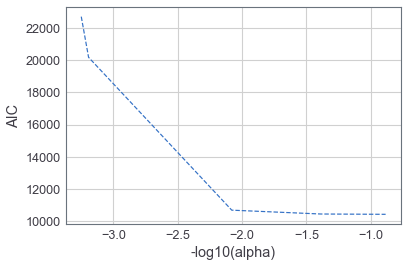

In [19]:
plt.plot(-np.log10(lasso_aic.alphas_), lasso_aic.criterion_, 'b--')
plt.xlabel('-log10(alpha)')
plt.ylabel('AIC')

In [37]:
date = df_house['DocumentDate'].values
for i in range(len(date)):
    date[i] = int(date[i][:4])
date.astype(float)

array([2014., 2006., 2007., ..., 2012., 2006., 2007.])

In [50]:
lin_reg = linear_model.SGDRegressor()
lin_reg.fit(X, y, sample_weight = date)
import sklearn
print(sklearn.__version__)

0.19.2


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [27]:
print(lin_reg.coef_, lin_reg.intercept_)

[ 2.28832107e+02 -6.05060092e-02 -1.94380990e+04 -4.77811534e+04
  1.06117210e+05] -521924.72203797416


In [54]:
scores = []
for iB in range(1000):
    indices = np.random.choice(len(y), len(y), replace=True)
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X[indices], y[indices])
    scores.append(lin_reg.score(X[indices], y[indices]))

Text(0,0.5,'RMS')

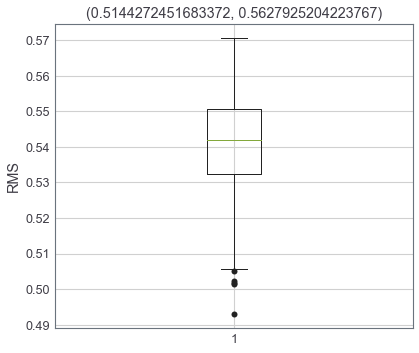

In [62]:
plt.boxplot(scores, sym='k')
plt.title("({}, {})".format(np.percentile(scores, 2.5), np.percentile(scores, 97.5)))
plt.ylabel('RMS')

In [82]:
X_predict, y_predict = [X[0]], y[0]
y_predicts = []
for iB in range(1000):
    indices = np.random.choice(len(y), len(y), replace=True)
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X[indices], y[indices])
    residual_index = np.random.choice(len(y))
    residual = y[residual_index] - lin_reg.predict([X[residual_index]])[0]
    y_predicts.append(lin_reg.predict(X_predict)[0] + residual)

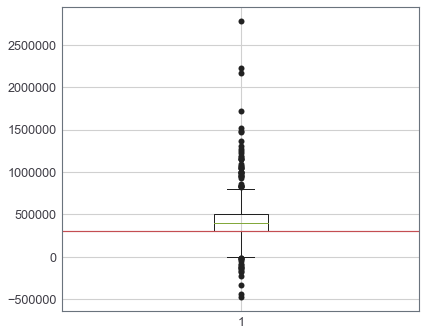

In [85]:
plt.boxplot(y_predicts, sym='k')
plt.axhline(y[0], color='r')
#plt.ylim([0,750000])

In [90]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22689 entries, 1 to 27063
Data columns (total 22 columns):
DocumentDate       22689 non-null object
SalePrice          22689 non-null int64
PropertyID         22689 non-null int64
PropertyType       22689 non-null object
ym                 22689 non-null object
zhvi_px            22689 non-null int64
zhvi_idx           22689 non-null float64
AdjSalePrice       22689 non-null float64
NbrLivingUnits     22689 non-null int64
SqFtLot            22689 non-null int64
SqFtTotLiving      22689 non-null int64
SqFtFinBasement    22689 non-null int64
Bathrooms          22689 non-null float64
Bedrooms           22689 non-null int64
BldgGrade          22689 non-null int64
YrBuilt            22689 non-null int64
YrRenovated        22689 non-null int64
TrafficNoise       22689 non-null int64
LandVal            22689 non-null int64
ImpsVal            22689 non-null int64
ZipCode            22689 non-null int64
NewConstruction    22689 non-null bool
dty

In [89]:
df_house['PropertyType'].value_counts()

Single Family    20722
Townhouse         1710
Multiplex          257
Name: PropertyType, dtype: int64

In [116]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

le = LabelEncoder()
df_house['PropertyType'] = le.fit_transform(df_house['PropertyType'])
emb_cat = pd.DataFrame(keras.utils.to_categorical(df_house['PropertyType']),
                      columns=['Multiplex', 'Single', 'Townhouse'])
emb_cat.head(10)

,Multiplex,Single,Townhouse
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [117]:
df_house.reset_index(inplace=True)
df_house = pd.concat([df_house, emb_cat], axis=1)
df_house.head()

,level_0,index,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,...,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,Multiplex,Single,Townhouse
0,0,1,2014-09-16,280000,1000102,0,2014-09-01,405100,0.930836,300805.0,...,1991,0,0,70000,229000,98002,False,1.0,0.0,0.0
1,1,2,2006-06-16,1000000,1200013,1,2006-06-01,404400,0.929228,1076162.0,...,2005,0,0,203000,590000,98166,True,0.0,1.0,0.0
2,2,3,2007-01-29,745000,1200019,1,2007-01-01,425600,0.977941,761805.0,...,1947,0,0,183000,275000,98166,False,0.0,1.0,0.0
3,3,4,2008-02-25,425000,2800016,1,2008-02-01,418400,0.961397,442065.0,...,1966,0,0,104000,229000,98168,False,0.0,1.0,0.0
4,4,5,2013-03-29,240000,2800024,1,2013-03-01,351600,0.807904,297065.0,...,1948,0,0,104000,205000,98168,False,0.0,1.0,0.0


In [125]:
X = df_house[['SqFtTotLiving', 'SqFtLot', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 
             'Townhouse', 'Single']]
y = df_house[['AdjSalePrice']]

In [126]:
lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3827.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:07:18   Log-Likelihood:            -3.1517e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.469e+05   2.24e+04    -19.986      0.000   -4.91e+05   -4.03e+05
SqFtTotLiving   223.3739      4.130     54.091      0.000     215.280     231.468
SqFtLot          -0.0352      0.031     -1.150      0.250      -0.095       0.025
SqFtLot          -0.0352      0.031     -1.150      0.250      -0.095       0.025
Bathrooms     -1.597e+04   3809.680     -4.193      0.000   -2.34e+04   -8505.902
Bedrooms       -5.09e+04   2537.687    -20.058      0.000   -5.59e+04   -4.59e+04
BldgGrade      1.094e+05   2457.175     44.533      0.000    1.05e+05    1.14e+05
Townhouse     -1.151e+05   1.82e+04     -6.340      0.000   -1.51e+05   -7.96e+04
Single        -8.469e+04   1.66e+04     -5.088      0.000   -1.17e+05   -5.21e+04
==============================================================================
Omnibus:                    29767.751   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19694167.912
Skew:                           6.926   Prob(JB):                         0.00
Kurtosis:                     146.667   Cond. No.                     4.51e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(97500, 98500)

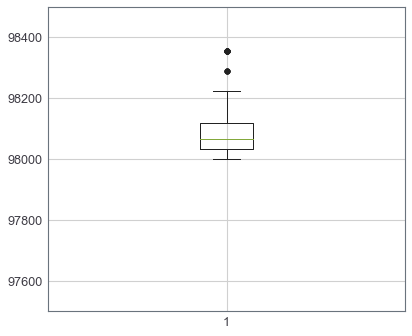

In [142]:
zips = df_house['ZipCode'].values
plt.boxplot(zips, sym='k')
plt.ylim([97500, 98500])

In [153]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X).ravel()
residuals = y.values.ravel() - y_pred

array([-200453.85015574,  -62385.6679145 ,  191361.47893646, ...,
         77172.62578742,   -7574.80592486,  241579.19407514])

(-2000000.0, 2000000.0)

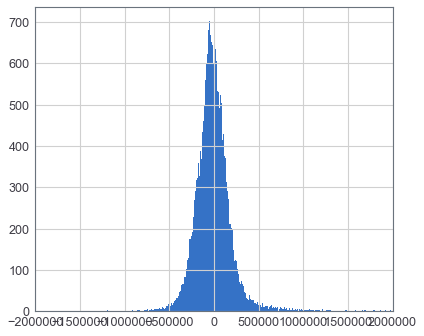

In [159]:
plt.hist(residuals, bins=1000)
plt.xlim([-0.2e7,0.2e7])

(97500, 98500)

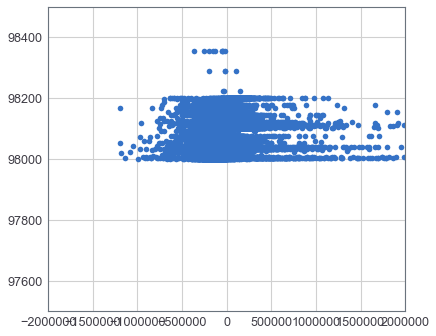

In [160]:
plt.plot(residuals, zips, 'bo')
plt.xlim([-0.2e7,0.2e7])
plt.ylim([97500, 98500])

In [185]:
df_zip = pd.DataFrame(data={'ZipCode': zips, 'residual': residuals})
df_zip.head()

,ZipCode,residual
0,98002,-200453.850156
1,98166,-62385.667915
2,98166,191361.478936
3,98168,-192240.089351
4,98168,-89398.447638


In [186]:
df_zip.groupby('ZipCode').mean().head(10)

,residual
ZipCode,
9800,82772.332085
89118,-59043.015926
98001,-142701.567655
98002,-65789.158348
98003,-138315.923749
98004,479109.869239
98005,90910.350078
98006,10940.947264
98007,7997.381107


In [221]:
mean_residual = df_zip.groupby('ZipCode').mean().values
zip_cuts = []
for i in range(6):
    zip_cuts.append(np.percentile(mean_residual, 20*i))
zip_cuts[0] -= 10
zip_cuts[-1] += 10
zip_cuts

[-521168.757486202,
 -100783.44216275869,
 -60053.72838119378,
 -9526.827573838393,
 94819.69910295578,
 1060296.1401270314]

In [222]:
df_zip_mean = df_zip.groupby('ZipCode').mean()
df_zip_mean.head()

,residual
ZipCode,
9800,82772.332085
89118,-59043.015926
98001,-142701.567655
98002,-65789.158348
98003,-138315.923749


In [224]:
df_zip_mean['zip_cat'] = (pd.cut(df_zip_mean['residual'], zip_cuts, 
                    labels=range(len(zip_cuts)-1))).astype(int)
df_zip_mean.head()

,residual,zip_cat
ZipCode,,
9800,82772.332085,3
89118,-59043.015926,2
98001,-142701.567655,0
98002,-65789.158348,1
98003,-138315.923749,0


In [226]:
df_house = df_house.join(df_zip_mean, on='ZipCode')
df_house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,residual,zip_cat
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,7,1991,0,0,70000,229000,98002,False,-65789.158348,1
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,10,2005,0,0,203000,590000,98166,True,-32786.736704,2
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,8,1947,0,0,183000,275000,98166,False,-32786.736704,2
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,7,1966,0,0,104000,229000,98168,False,-59434.978576,2
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,7,1948,0,0,104000,205000,98168,False,-59434.978576,2


<Container object of 5 artists>

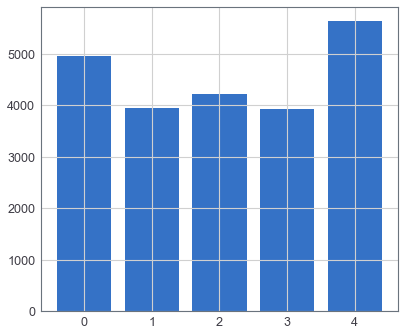

In [241]:
plt.bar(range(5), df_house.groupby('zip_cat')['zip_cat'].value_counts())

In [250]:
X = df_house[['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house['AdjSalePrice'].values

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     5515.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:56:49   Log-Likelihood:            -3.1500e+05
No. Observations:               22689   AIC:                         6.300e+05
Df Residuals:                   22683   BIC:                         6.301e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.876e+05   1.58e+04    -37.092      0.000   -6.19e+05   -5.57e+05
x1         -4.979e+04   2466.447    -20.186      0.000   -5.46e+04    -4.5e+04
x2          1.202e+05   2475.403     48.541      0.000    1.15e+05    1.25e+05
x3           196.7962      4.125     47.709      0.000     188.711     204.881
x4            90.3950      4.498     20.095      0.000      81.578      99.212
x5         -1.761e+04   3588.906     -4.906      0.000   -2.46e+04   -1.06e+04
==============================================================================
Omnibus:                    29815.495   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20230173.785
Skew:                           6.939   Prob(JB):                         0.00
Kurtosis:                     148.625   Cond. No.                     2.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
X = df_house[['Bedrooms', 'BldgGrade']].values
y = df_house['AdjSalePrice'].values

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
lin_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     9706.
Date:                Mon, 20 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:57:10   Log-Likelihood:            -3.1701e+05
No. Observations:               22689   AIC:                         6.340e+05
Df Residuals:                   22686   BIC:                         6.340e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.167e+06   1.27e+04    -92.190      0.000   -1.19e+06   -1.14e+06
x1          3.125e+04   2233.737     13.989      0.000    2.69e+04    3.56e+04
x2          2.118e+05   1711.234    123.749      0.000    2.08e+05    2.15e+05
==============================================================================
Omnibus:                    29852.543   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17420290.766
Skew:                           7.019   Prob(JB):                         0.00
Kurtosis:                     138.018   Cond. No.                         57.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
df_house.corr()

,SalePrice,PropertyID,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
SalePrice,1.000000,-0.026192,0.096770,0.096770,0.985467,0.023776,0.134764,0.689925,0.294919,0.524452,0.311337,0.666946,0.082491,0.105938,-0.011723,0.804943,0.825471,-0.017014,0.048791
PropertyID,-0.026192,1.000000,-0.015182,-0.015182,-0.024616,-0.014102,-0.114653,-0.020237,-0.036200,-0.006150,-0.027491,-0.010204,0.031254,-0.010435,-0.032571,-0.032630,-0.011651,0.001687,0.046724
zhvi_px,0.096770,-0.015182,1.000000,1.000000,-0.044627,0.015245,-0.012901,-0.021590,-0.007247,-0.027789,-0.000330,-0.045961,-0.016092,-0.000766,0.008455,-0.023783,-0.031458,0.004230,0.038360
zhvi_idx,0.096770,-0.015182,1.000000,1.000000,-0.044627,0.015245,-0.012901,-0.021590,-0.007247,-0.027789,-0.000330,-0.045961,-0.016092,-0.000766,0.008455,-0.023783,-0.031458,0.004230,0.038360
AdjSalePrice,0.985467,-0.024616,-0.044627,-0.044627,1.000000,0.022540,0.137143,0.695183,0.297593,0.529189,0.312020,0.675625,0.082276,0.107760,-0.012271,0.812167,0.833389,-0.017856,0.041172
NbrLivingUnits,0.023776,-0.014102,0.015245,0.015245,0.022540,1.000000,-0.005113,0.059563,0.066803,0.111227,0.168076,-0.048095,-0.109173,0.011371,0.083209,0.031421,0.003004,0.005786,-0.036871
SqFtLot,0.134764,-0.114653,-0.012901,-0.012901,0.137143,-0.005113,1.000000,0.195950,0.035421,0.107436,0.069076,0.145501,0.068406,0.006912,-0.012827,0.071051,0.107663,-0.010942,-0.067399
SqFtTotLiving,0.689925,-0.020237,-0.021590,-0.021590,0.695183,0.059563,0.195950,1.000000,0.407127,0.764186,0.600288,0.770493,0.311597,0.067160,-0.060718,0.467805,0.761816,-0.031595,0.113968
SqFtFinBasement,0.294919,-0.036200,-0.007247,-0.007247,0.297593,0.066803,0.035421,0.407127,1.000000,0.272684,0.312405,0.137570,-0.210897,0.109488,0.053026,0.283728,0.281781,0.016431,-0.113575
Bathrooms,0.524452,-0.006150,-0.027789,-0.027789,0.529189,0.111227,0.107436,0.764186,0.272684,1.000000,0.537953,0.658772,0.468643,0.066460,-0.060015,0.309340,0.625276,-0.028770,0.197179


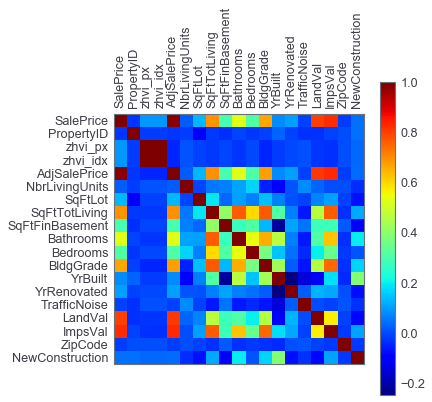

In [268]:
columns = df_house.corr().columns

plt.matshow(df_house.corr().values, cmap='jet')
plt.grid(False)
plt.xticks(range(len(columns)), columns, rotation=90)
plt.yticks(range(len(columns)), columns)
plt.colorbar()

In [288]:
X = df_house[['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house['AdjSalePrice'].values

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
residuals = y - lin_reg.predict(X)
std_res = np.std(residuals)
residuals /= std_res
print('min', np.argmin(residuals), residuals[np.argmin(residuals)])
print('max', np.argmax(residuals), residuals[np.argmax(residuals)])

min 8006 -4.926838362420435
max 16975 36.60676247173345


In [296]:
df_house.iloc[[16975]]

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
20115,2006-08-22,11000000,7397300120,Single Family,2006-08-01,411100,0.944623,11644855.0,2,44000,...,6.5,6,13,1995,0,0,3612000,4846000,98039,False


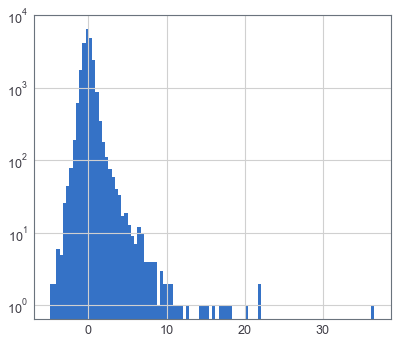

In [294]:
plt.hist(residuals, bins=100)
plt.yscale('log', nonposy='clip')

In [309]:
X = df_house[df_house['ZipCode']==98105][['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house[df_house['ZipCode']==98105]['AdjSalePrice'].values

lin_reg_sm = sm.OLS(y, sm.add_constant(X)).fit()
#stats.outliers_influence.OLSInfluence.summary_frame(lin_reg_sm) ???

Text(0,0.5,'Residuals')

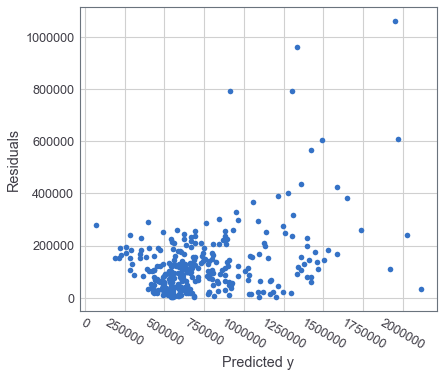

In [315]:
X = df_house[df_house['ZipCode']==98105][['Bedrooms', 'BldgGrade', 
              'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms']].values
y = df_house[df_house['ZipCode']==98105]['AdjSalePrice'].values

lin_reg.fit(X, y)
residuals = y - lin_reg.predict(X)
plt.plot(lin_reg.predict(X), np.abs(residuals), 'bo')
plt.xticks(rotation=-30)
plt.xlabel('Predicted y')
plt.ylabel('Residuals')